 Neural network, experimentation tool, version 1


Training with Data Mode: default
Epoch 1, Loss: 0.03753308147719537
Epoch 2, Loss: 0.02088356473316536
Epoch 3, Loss: 0.020720109252055634
Epoch 4, Loss: 0.020734027101977116
Epoch 5, Loss: 0.02073619778296876
Epoch 6, Loss: 0.020736178276312734
Epoch 7, Loss: 0.020735841664702815
Epoch 8, Loss: 0.020735445968161178
Epoch 9, Loss: 0.02073502470992775
Epoch 10, Loss: 0.020734581444532142
Epoch 11, Loss: 0.020734115708870248
Epoch 12, Loss: 0.020733626461370957
Epoch 13, Loss: 0.020733112535468265
Epoch 14, Loss: 0.020732572697368598
Epoch 15, Loss: 0.020732005651292153
Epoch 16, Loss: 0.020731410037649885
Epoch 17, Loss: 0.020730784430174936
Epoch 18, Loss: 0.020730127332802342
Epoch 19, Loss: 0.02072943717639838
Epoch 20, Loss: 0.02072871231534901
Epoch 21, Loss: 0.020727951024005518
Epoch 22, Loss: 0.020727151492982984
Epoch 23, Loss: 0.0207263118253076
Epoch 24, Loss: 0.020725430032409183
Epoch 25, Loss: 0.020724504029954426
Epoch 26, Loss: 0.020723531633518092
Epoch 27, Loss: 0.020

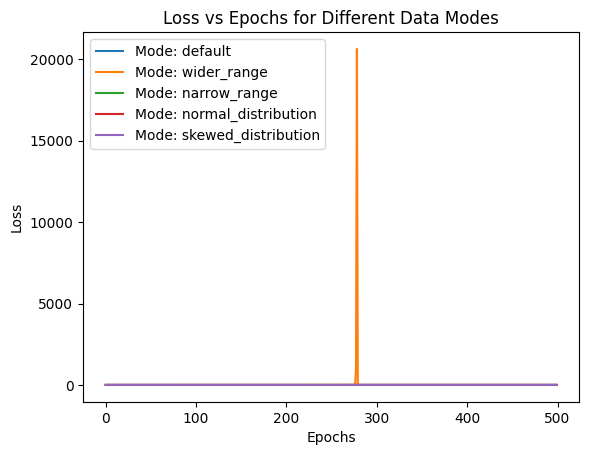

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions with output capping
def activation_ReLU(number):
    return min(max(number, 0), 1e6)  # Cap the output

def activation_ReLU_partial_derivative(number):
    return 1 if number > 0 else 0

# Modified Data Generator with normalization
def generate_train_data(mode="default"):
    result = []
    for _ in range(100):
        if mode == "default":
            n1 = np.random.randint(0, 5) / 5.0
            n2 = np.random.randint(3, 7) / 7.0
            n3 = (n1 ** 2 + n2 + np.random.randint(0, 5)) / 10
        elif mode == "wider_range":
            n1 = np.random.randint(0, 20) / 10
            n2 = np.random.randint(10, 30) / 10
            n3 = (n1 ** 2 + n2 + np.random.randint(0, 20)) / 10
        elif mode == "narrow_range":
            n1 = np.random.randint(0, 2) / 5.0
            n2 = np.random.randint(1, 3) / 3.0
            n3 = (n1 ** 2 + n2 + np.random.randint(0, 2)) / 10
        elif mode == "normal_distribution":
            n1 = max(0, int(np.random.normal(5, 2))) / 10
            n2 = max(0, int(np.random.normal(10, 3))) / 10
            n3 = (n1 ** 2 + n2 + np.random.randint(0, 5)) / 10
        elif mode == "skewed_distribution":
            n1 = np.random.choice([1, 2, 3, 4], p=[0.7, 0.2, 0.07, 0.03]) / 10
            n2 = np.random.choice([5, 6, 7, 8], p=[0.6, 0.3, 0.08, 0.02]) / 10
            n3 = (n1 ** 2 + n2 + np.random.randint(0, 5)) / 10
        else:
            raise ValueError("Unsupported mode for data generation.")
        result.append([n1, n2, n3])
    return result

# Initialize weights and biases
def initialize_parameters():
    return {
        'w1': 0.01, 'w2': 0.01, 'w3': 0.01, 'w4': -0.01, 'w5': 0.01, 'w6': 0.01,
        'bias1': 0.01, 'bias2': 0.0, 'bias3': 0.01
    }

# Training function
def train_network(data, learning_rate, epochs):
    params = initialize_parameters()
    loss_points = []

    for epoch in range(epochs):
        total_loss = 0
        for row in data:
            input1, input2, true_value = row

            # Forward pass
            node_1_output = activation_ReLU(input1 * params['w1'] + input2 * params['w3'] + params['bias1'])
            node_2_output = activation_ReLU(input1 * params['w2'] + input2 * params['w4'] + params['bias2'])
            node_3_output = activation_ReLU(node_1_output * params['w5'] + node_2_output * params['w6'] + params['bias3'])

            # Loss calculation
            loss = min((node_3_output - true_value) ** 2, 1e6)
            total_loss += loss

            # Backpropagation
            deriv_L_w5 = 2 * node_1_output * (node_3_output - true_value)
            deriv_L_w6 = 2 * node_2_output * (node_3_output - true_value)
            deriv_L_b3 = 2 * (node_3_output - true_value)
            
            params['w5'] -= learning_rate * deriv_L_w5
            params['w6'] -= learning_rate * deriv_L_w6
            params['bias3'] -= learning_rate * deriv_L_b3

            deriv_L_w1 = (2 * params['w5'] * (node_3_output - true_value) *
                          activation_ReLU_partial_derivative(input1 * params['w1'] + input2 * params['w3'] + params['bias1']) * input1)
            params['w1'] -= learning_rate * deriv_L_w1

        loss_points.append(total_loss / len(data))
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(data)}")

    return loss_points

# Experiment with data generation modes
modes = ["default", "wider_range", "narrow_range", "normal_distribution", "skewed_distribution"]
learning_rate = 0.01
epochs = 500

for mode in modes:
    print(f"\nTraining with Data Mode: {mode}")
    data = generate_train_data(mode)
    loss_points = train_network(data, learning_rate, epochs)

    # Plot loss points
    plt.plot(loss_points, label=f"Mode: {mode}")

plt.title("Loss vs Epochs for Different Data Modes")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
